# DO NOT RUN ALL. 
---
You can retrieve the 'LSWMD.pkl' at https://www.kaggle.com/datasets/qingyi/wm811k-wafer-map

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

pickle = pd.read_pickle('LSWMD.pkl')

data = pd.DataFrame(pickle)

data['failureType'] =data['failureType'].astype(str)

scratch = data.loc[data['failureType'] == "[['Scratch']]"]
edgeloc = data.loc[data['failureType'] == "[['Edge-Loc']]"]
edgering = data.loc[data['failureType'] == "[['Edge-Ring']]"]
loc = data.loc[data['failureType'] == "[['Loc']]"]

scratch.reset_index(inplace=True, drop=True)
edgeloc.reset_index(inplace=True, drop=True)
edgering.reset_index(inplace=True, drop=True)
loc.reset_index(inplace=True, drop=True)

scratch = scratch.iloc[:400]
loc = loc.iloc[:100]
edgering = edgering.iloc[:100]
edgeloc = edgeloc.iloc[:100]

scratch.name = 'scratch'
edgeloc.name = 'edgeloc'
edgering.name = 'edgering'
loc.name = 'loc'




C:\Users\limmi\AppData\Local\Temp\ipykernel_16720\1728720331.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
loc

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,[[Training]],[['Loc']]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,16.0,[[Training]],[['Loc']]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,23.0,[[Training]],[['Loc']]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot3,24.0,[[Training]],[['Loc']]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot26,22.0,[[Training]],[['Loc']]
...,...,...,...,...,...,...
95,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",938.0,lot1388,4.0,[[Training]],[['Loc']]
96,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",938.0,lot1388,5.0,[[Training]],[['Loc']]
97,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",938.0,lot1388,6.0,[[Training]],[['Loc']]
98,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",938.0,lot1388,7.0,[[Training]],[['Loc']]


In [4]:

def crop(failuretype, i, size,height_a, height_b, width):
    
    upscale = np.kron(failuretype.waferMap[i], np.ones((size,size)))

    upscale = pd.DataFrame(upscale)

    print(upscale.shape)

    upscale = upscale.iloc[height_a:height_b]

    upscale.drop(columns=upscale.columns[:width], axis=1, inplace=True)
    upscale.drop(columns=upscale.columns[-width:], axis=1, inplace=True)

    print(upscale.shape)

    upscale = upscale.to_numpy()

    plt.imshow(upscale)

    filename = f'{failuretype.name}_{i}.png'
    plt.imsave(filename, upscale, cmap='Greys_r')

## LOC
---
<b> DO NOT TOUCH OR RUN! </b>

Use this for reference only.

In [15]:
locset = [(26, 26), (36, 34), (37, 37), (37, 55), (43, 43), (45, 48), (50, 43), (53, 58), (60, 40)]
loctype = []


for i in range(0, loc.shape[0]):

    if loc.waferMap[i].shape == locset[0]:
        loctype.append(0)

    elif loc.waferMap[i].shape == locset[1]:
        loctype.append(1)

    elif loc.waferMap[i].shape == locset[2]:
        loctype.append(2)

    elif loc.waferMap[i].shape == locset[3]:
        loctype.append(3)

    elif loc.waferMap[i].shape == locset[4]:
        loctype.append(4)
    
    elif loc.waferMap[i].shape == locset[5]:
        loctype.append(5)

    elif loc.waferMap[i].shape == locset[6]:
        loctype.append(6)
    
    elif loc.waferMap[i].shape == locset[7]:
        loctype.append(7)

    else:
        loctype.append(8)

loc['sizes'] = loctype

loc.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,sizes


(252, 238)
(135, 168)


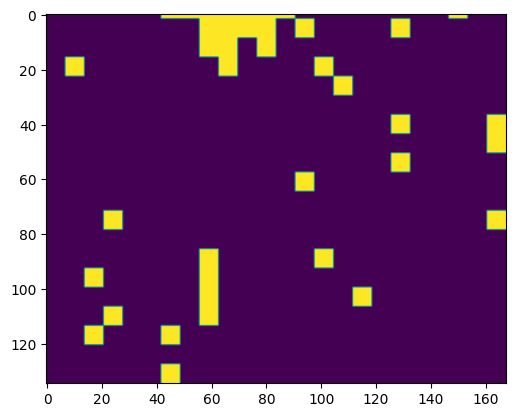

In [460]:
# testing ground

# displayed color map must be purple and yellow!!!


# take note of the following when using the crop
# function for consistency:
#       - use 5/7/10 for size
#       - use 40 & 175 for height
# output shape should either be 135*169/135*170/135*171

# size    number
# 0         4
# 1         95
# 2         71
# 3         78
# 4         80
# 5         0
# 6         79
# 7         1
# 8         43

(225, 240)
(135, 170)
(265, 290)
(135, 170)
(265, 290)
(135, 170)
(265, 290)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)

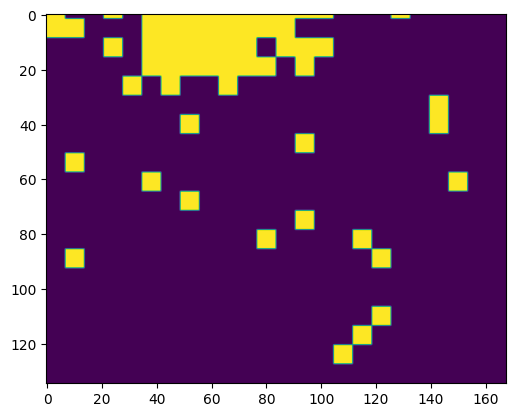

In [461]:

for i in range(0, loc.shape[0]):    


    match loc.sizes[i]:

        case 0:
            crop(loc, i, 10, 40, 175, 45)

        case 1:
            crop(loc, i, 7, 40, 175, 35)

        case 2:
            crop(loc, i, 7, 40, 175, 45)

        case 3: 
            crop(loc, i, 7, 40, 175, 108)

        case 4:
            crop(loc, i, 7, 40, 175, 66)

        case 5:
            crop(loc, i, 5, 40, 175, 35)

        case 6:
            crop(loc, i, 7, 40, 175, 66)

        case 7:
            crop(loc, i, 5, 40, 175, 60)
        
        case 8:
            crop(loc, i, 10, 40, 175, 115)


# EDGE LOC
---
<b> DO NOT TOUCH OR RUN! </b>

Use this for reference only.


In [276]:
edgelocshape = []

for i in range(0, edgeloc.shape[0]):

    edgelocshape.append(edgeloc.waferMap[i].shape)

edgelocset = [(26, 26), (37, 55), (39, 39), (41, 57), (53, 58), (70, 58)]

edgeloctype = []

for i in range(0, edgeloc.shape[0]):

    if edgeloc.waferMap[i].shape == edgelocset[0]:
        edgeloctype.append(0)

    elif edgeloc.waferMap[i].shape == edgelocset[1]:
        edgeloctype.append(1)

    elif edgeloc.waferMap[i].shape == edgelocset[2]:
        edgeloctype.append(2)

    elif edgeloc.waferMap[i].shape == edgelocset[3]:
        edgeloctype.append(3)

    elif edgeloc.waferMap[i].shape == edgelocset[4]:
        edgeloctype.append(4)
    
    elif edgeloc.waferMap[i].shape == edgelocset[5]:
        edgeloctype.append(5)


edgeloc['sizes'] = edgeloctype

edgeloc.head()


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,sizes
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,[[Training]],[['Edge-Loc']],4
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,[[Training]],[['Edge-Loc']],4
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,[[Training]],[['Edge-Loc']],4
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,[[Training]],[['Edge-Loc']],4
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,17.0,[[Training]],[['Edge-Loc']],4


In [ ]:
# testing ground

# --------------------------------------------------

# displayed color map must be purple and yellow!!!


# take note of the following when using the crop
# function for consistency:
#                               use 5/7/10 for size
#                               use 40 & 175 for height

# only alter if none of these numbers does not work
# (which should not occur).

# output shape should either be 135*169
#                               135*170
#                               135*171

# --------------------------------------------------

# use the following reference when experimenting
# with the crop function. 

# remove the quotation marks (""). 

# size    number
# 0         8
# 1         90
# 2         96
# 3         92
# 4         0
# 5         5

# --------------------------------------------------


# crop(edgeloc, "number", "size", 40, 175, "width") 


(265, 290)
(135, 170)
(265, 290)
(135, 170)
(265, 290)
(135, 170)
(265, 290)
(135, 170)
(265, 290)
(135, 170)
(265, 290)
(135, 170)
(265, 290)
(135, 170)
(265, 290)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)

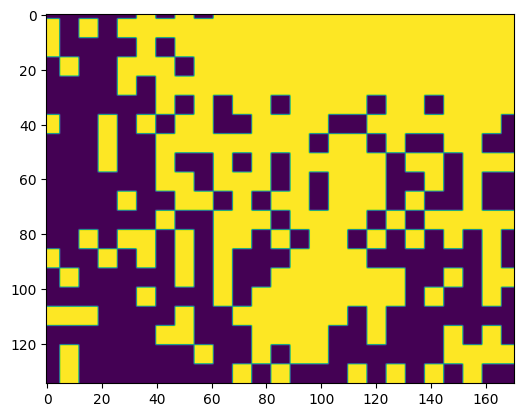

In [370]:

for i in range(0, edgeloc.shape[0]):    


    match edgeloc.sizes[i]:

        case 0:
            crop(edgeloc, i, 10, 40, 175, 45) 

        case 1:
            crop(edgeloc, i, 7, 40, 175, 108) 

        case 2:
            crop(edgeloc, i, 7, 40, 175, 51) 

        case 3:
            crop(edgeloc, i, 5, 40, 175, 58) 

        case 4:
            crop(edgeloc, i, 5, 40, 175, 60) 

        case 5:
            crop(edgeloc, i, 5, 40, 175, 60) 


# EDGE RING

In [5]:
edgeringshape = []


for i in range(0, edgering.shape[0]):

    edgeringshape.append(edgering.waferMap[i].shape)


edgeringset = [(26, 25),(26, 26),(33, 33),(34, 34),(35, 38),(41, 56),(42, 29),(53, 58),(54, 42),(63, 62)]

edgeringtype = []


for i in range(0, edgering.shape[0]):

    if edgering.waferMap[i].shape == edgeringset[0]:
        edgeringtype.append(0)

    elif edgering.waferMap[i].shape == edgeringset[1]:
        edgeringtype.append(1)

    elif edgering.waferMap[i].shape == edgeringset[2]:
        edgeringtype.append(2)

    elif edgering.waferMap[i].shape == edgeringset[3]:
        edgeringtype.append(3)

    elif edgering.waferMap[i].shape == edgeringset[4]:
        edgeringtype.append(4)
    
    elif edgering.waferMap[i].shape == edgeringset[5]:
        edgeringtype.append(5)

    elif edgering.waferMap[i].shape == edgeringset[6]:
        edgeringtype.append(6)

    elif edgering.waferMap[i].shape == edgeringset[7]:
        edgeringtype.append(7)

    elif edgering.waferMap[i].shape == edgeringset[8]:
        edgeringtype.append(8)

    elif edgering.waferMap[i].shape == edgeringset[9]:
        edgeringtype.append(9)
    

edgering['sizes'] = edgeringtype

loc.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,[[Training]],[['Loc']]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,16.0,[[Training]],[['Loc']]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,23.0,[[Training]],[['Loc']]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot3,24.0,[[Training]],[['Loc']]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot26,22.0,[[Training]],[['Loc']]


(540, 420)
(135, 170)


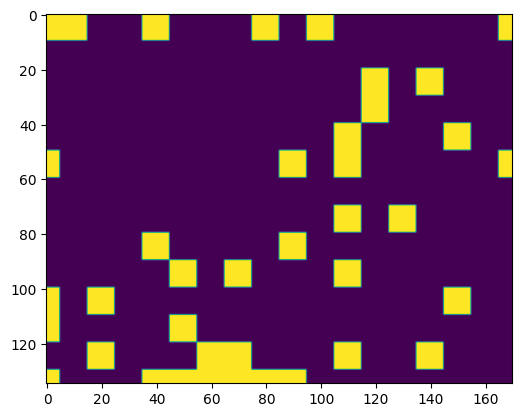

In [24]:
# testing ground

# --------------------------------------------------

# displayed color map must be purple and yellow!!!


# take note of the following when using the crop
# function for consistency:
#                               use 5/7/10 for size
#                               use 40 & 175 for height

# only alter if none of these numbers does not work
# (which should not occur).

# output shape should either be 135*169
#                               135*170
#                               135*171

# --------------------------------------------------

# use the following reference when experimenting
# with the crop function. 

# remove the quotation marks (""). 

# size    number
# 0         21
# 1         1
# 2         41
# 3         32
# 4         17
# 5         19
# 6         15
# 7         0
# 8         12
# 9         42

# --------------------------------------------------


# crop(edgering, 42, 5, 40, 175, 70) 

# edgering.loc[edgering.sizes ==8]
crop(edgering, 12, 10, 40, 175, 125) 


(265, 290)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(540, 420)
(135, 170)
(540, 420)
(135, 170)
(540, 420)
(135, 170)
(420, 290)
(135, 170)
(420, 290)
(135, 170)
(350, 380)
(135, 170)
(350, 380)
(135, 170)
(205, 280)
(135, 170)
(205, 280)
(135, 170)
(260, 250)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(260, 260)
(135, 170)
(540, 420)
(135, 170)
(540, 420)
(135, 170)
(340, 340)
(135, 170)
(340, 340)
(135, 170)
(340, 340)
(135, 170)
(340, 340)
(135, 170)
(340, 340)
(135, 170)
(340, 340)
(135, 170)
(340, 340)
(135, 170)
(340, 340)
(135, 170)
(340, 340)
(135, 170)
(330, 330)
(135, 170)
(315, 310)
(135, 170)
(315, 310)
(135, 170)
(315, 310)
(135, 170)
(315, 310)

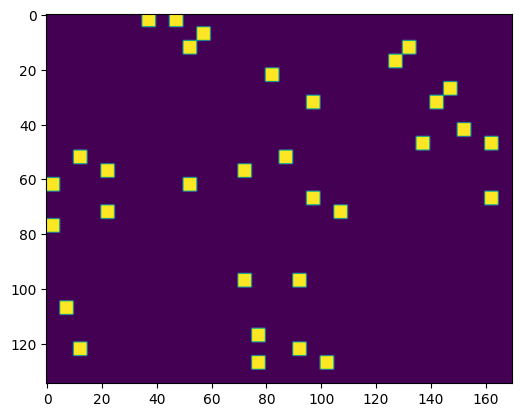

In [25]:

for i in range(0, edgering.shape[0]):    


    match edgering.sizes[i]:

        case 0:
            crop(edgering, i, 10, 40, 175, 40) 

        case 1:
           crop(edgering, i, 10, 40, 175, 45) 

        case 2:
            crop(edgering, i, 10, 40, 175, 80) 

        case 3:
           crop(edgering, i, 10, 40, 175, 85) 

        case 4:
           crop(edgering, i, 10, 40, 175, 105) 

        case 5:
           crop(edgering, i, 5, 40, 175, 55) 

        case 6:
           crop(edgering, i, 10, 40, 175, 60) 

        case 7:
            crop(edgering, i, 5, 40, 175, 60) 

        case 8:
            crop(edgering, i, 10, 40, 175, 125) 

        case 9:
            crop(edgering, i, 5, 40, 175, 70) 


# SCRATCH

In [480]:

scratchshape = []

for i in range(0, scratch.shape[0]):

    scratchshape.append(scratch.waferMap[i].shape)

scratchset = [(25, 27),(26, 26),(26, 30),(26, 50),(27, 27),(30, 34),(31, 28),(32, 29),(32, 33),(33, 29),(33, 33),(34, 34),(34, 35),(35, 31),
                 (35, 36),(35, 40),(36, 30),(36, 34),(37, 55),(38, 38),(38, 39),(38, 62),(39, 31),(39, 37),(39, 39),(39, 45),(39, 50),(40, 40),
                 (40, 43),(41, 38),(41, 41),(42, 56),(42, 61),(43, 42),(44, 41),(44, 44),(44, 45),(44, 46),(45, 43),(45, 45),(45, 48),(46, 46),
                 (48, 51),(48, 61),(50, 43),(51, 41),(51, 44),(51, 50),(51, 59),(52, 52),(52, 55),(52, 59),(53, 44),(53, 58),(54, 71),(55, 53),
                 (55, 55),(55, 66),(56, 41),(56, 57),(56, 63),(57, 57),(57, 58),(57, 60),(58, 53),(58, 59),(59, 42),(59, 46),(59, 54),(59, 56),
                 (59, 60),(60, 55),(62, 61),(62, 62),(63, 59),(63, 62),(63, 64),(63, 76),(64, 60),(64, 61),(64, 71),(64, 72),(65, 60),(66, 66),
                 (66, 72),(66, 77),(68, 72),(68, 75),(69, 62),(69, 69),(69, 73),(70, 75),(72, 44),(72, 67),(72, 72),(73, 79),(74, 76),(75, 48),
                 (75, 61),(75, 90),(76, 85),(77, 76),(79, 80),(81, 73),(81, 81),(86, 89),(87, 71),(87, 74),(87, 89),(88, 81),(89, 76),(89, 81),
                 (89, 112),(95, 100),(101, 103),(102, 66),(107, 150),(109, 111),(113, 71),(116, 146),(118, 84),(122, 104),(133, 97),(135, 146),
                 (212, 84)]

# GGWP

scratchtype = []


# I USED HTML FOR THIS 

for i in range(0, scratch.shape[0]):

    if scratch.waferMap[i].shape == scratchset[0]:
            scratchtype.append(0)
    
    elif scratch.waferMap[i].shape == scratchset[1]:
            scratchtype.append(1)
 
    elif scratch.waferMap[i].shape == scratchset[2] :
            scratchtype.append(2)

    elif scratch.waferMap[i].shape == scratchset[3] :
            scratchtype.append(3)
 
    elif scratch.waferMap[i].shape == scratchset[4] :
            scratchtype.append(4)
 
    elif scratch.waferMap[i].shape == scratchset[5] :
            scratchtype.append(5)
 
    elif scratch.waferMap[i].shape == scratchset[6] :
            scratchtype.append(6)
 
    elif scratch.waferMap[i].shape == scratchset[7] :
            scratchtype.append(7)
 
    elif scratch.waferMap[i].shape == scratchset[8] :
            scratchtype.append(8)
 
    elif scratch.waferMap[i].shape == scratchset[9] :
            scratchtype.append(9)
 
    elif scratch.waferMap[i].shape == scratchset[10]: 
            scratchtype.append(10)

    elif scratch.waferMap[i].shape == scratchset[11]: 
            scratchtype.append(11)

    elif scratch.waferMap[i].shape == scratchset[12]: 
            scratchtype.append(12)

    elif scratch.waferMap[i].shape == scratchset[13]: 
            scratchtype.append(13)

    elif scratch.waferMap[i].shape == scratchset[14]: 
            scratchtype.append(14)

    elif scratch.waferMap[i].shape == scratchset[15]: 
            scratchtype.append(15)

    elif scratch.waferMap[i].shape == scratchset[16]: 
            scratchtype.append(16)

    elif scratch.waferMap[i].shape == scratchset[17]: 
            scratchtype.append(17)

    elif scratch.waferMap[i].shape == scratchset[18]: 
            scratchtype.append(18)

    elif scratch.waferMap[i].shape == scratchset[19]: 
            scratchtype.append(19)

    elif scratch.waferMap[i].shape == scratchset[20]: 
            scratchtype.append(20)

    elif scratch.waferMap[i].shape == scratchset[21]: 
            scratchtype.append(21)

    elif scratch.waferMap[i].shape == scratchset[22]: 
            scratchtype.append(22)

    elif scratch.waferMap[i].shape == scratchset[23]: 
            scratchtype.append(23)

    elif scratch.waferMap[i].shape == scratchset[24]: 
            scratchtype.append(24)

    elif scratch.waferMap[i].shape == scratchset[25]: 
            scratchtype.append(25)

    elif scratch.waferMap[i].shape == scratchset[26]: 
            scratchtype.append(26)

    elif scratch.waferMap[i].shape == scratchset[27]: 
            scratchtype.append(27)

    elif scratch.waferMap[i].shape == scratchset[28]: 
            scratchtype.append(28)

    elif scratch.waferMap[i].shape == scratchset[29]: 
            scratchtype.append(29)

    elif scratch.waferMap[i].shape == scratchset[30]: 
            scratchtype.append(30)

    elif scratch.waferMap[i].shape == scratchset[31]: 
            scratchtype.append(31)

    elif scratch.waferMap[i].shape == scratchset[32]: 
            scratchtype.append(32)

    elif scratch.waferMap[i].shape == scratchset[33]: 
            scratchtype.append(33)

    elif scratch.waferMap[i].shape == scratchset[34]: 
            scratchtype.append(34)

    elif scratch.waferMap[i].shape == scratchset[35]: 
            scratchtype.append(35)

    elif scratch.waferMap[i].shape == scratchset[36]: 
            scratchtype.append(36)

    elif scratch.waferMap[i].shape == scratchset[37]: 
            scratchtype.append(37)

    elif scratch.waferMap[i].shape == scratchset[38]: 
            scratchtype.append(38)

    elif scratch.waferMap[i].shape == scratchset[39]: 
            scratchtype.append(39)

    elif scratch.waferMap[i].shape == scratchset[40]: 
            scratchtype.append(40)

    elif scratch.waferMap[i].shape == scratchset[41]: 
            scratchtype.append(41)

    elif scratch.waferMap[i].shape == scratchset[42]: 
            scratchtype.append(42)

    elif scratch.waferMap[i].shape == scratchset[43]: 
            scratchtype.append(43)

    elif scratch.waferMap[i].shape == scratchset[44]: 
            scratchtype.append(44)

    elif scratch.waferMap[i].shape == scratchset[45]: 
            scratchtype.append(45)

    elif scratch.waferMap[i].shape == scratchset[46]: 
            scratchtype.append(46)

    elif scratch.waferMap[i].shape == scratchset[47]: 
            scratchtype.append(47)

    elif scratch.waferMap[i].shape == scratchset[48]: 
            scratchtype.append(48)

    elif scratch.waferMap[i].shape == scratchset[49]: 
            scratchtype.append(49)

    elif scratch.waferMap[i].shape == scratchset[50]: 
            scratchtype.append(50)

    elif scratch.waferMap[i].shape == scratchset[51]: 
            scratchtype.append(51)

    elif scratch.waferMap[i].shape == scratchset[52]: 
            scratchtype.append(52)

    elif scratch.waferMap[i].shape == scratchset[53]: 
            scratchtype.append(53)

    elif scratch.waferMap[i].shape == scratchset[54]: 
            scratchtype.append(54)

    elif scratch.waferMap[i].shape == scratchset[55]: 
            scratchtype.append(55)

    elif scratch.waferMap[i].shape == scratchset[56]: 
            scratchtype.append(56)

    elif scratch.waferMap[i].shape == scratchset[57]: 
            scratchtype.append(57)

    elif scratch.waferMap[i].shape == scratchset[58]: 
            scratchtype.append(58)

    elif scratch.waferMap[i].shape == scratchset[59]: 
            scratchtype.append(59)

    elif scratch.waferMap[i].shape == scratchset[60]: 
            scratchtype.append(60)

    elif scratch.waferMap[i].shape == scratchset[61]: 
            scratchtype.append(61)

    elif scratch.waferMap[i].shape == scratchset[62]: 
            scratchtype.append(62)

    elif scratch.waferMap[i].shape == scratchset[63]: 
            scratchtype.append(63)

    elif scratch.waferMap[i].shape == scratchset[64]: 
            scratchtype.append(64)

    elif scratch.waferMap[i].shape == scratchset[65]: 
            scratchtype.append(65)

    elif scratch.waferMap[i].shape == scratchset[66]: 
            scratchtype.append(66)

    elif scratch.waferMap[i].shape == scratchset[67]: 
            scratchtype.append(67)

    elif scratch.waferMap[i].shape == scratchset[68]: 
            scratchtype.append(68)

    elif scratch.waferMap[i].shape == scratchset[69]: 
            scratchtype.append(69)

    elif scratch.waferMap[i].shape == scratchset[70]: 
            scratchtype.append(70)

    elif scratch.waferMap[i].shape == scratchset[71]: 
            scratchtype.append(71)

    elif scratch.waferMap[i].shape == scratchset[72]: 
            scratchtype.append(72)

    elif scratch.waferMap[i].shape == scratchset[73]: 
            scratchtype.append(73)

    elif scratch.waferMap[i].shape == scratchset[74]: 
            scratchtype.append(74)

    elif scratch.waferMap[i].shape == scratchset[75]: 
            scratchtype.append(75)

    elif scratch.waferMap[i].shape == scratchset[76]: 
            scratchtype.append(76)

    elif scratch.waferMap[i].shape == scratchset[77]: 
            scratchtype.append(77)

    elif scratch.waferMap[i].shape == scratchset[78]: 
            scratchtype.append(78)

    elif scratch.waferMap[i].shape == scratchset[79]: 
            scratchtype.append(79)

    elif scratch.waferMap[i].shape == scratchset[80]: 
            scratchtype.append(80)

    elif scratch.waferMap[i].shape == scratchset[81]: 
            scratchtype.append(81)

    elif scratch.waferMap[i].shape == scratchset[82]: 
            scratchtype.append(82)

    elif scratch.waferMap[i].shape == scratchset[83]: 
            scratchtype.append(83)

    elif scratch.waferMap[i].shape == scratchset[84]: 
            scratchtype.append(84)

    elif scratch.waferMap[i].shape == scratchset[85]: 
            scratchtype.append(85)

    elif scratch.waferMap[i].shape == scratchset[86]: 
            scratchtype.append(86)

    elif scratch.waferMap[i].shape == scratchset[87]: 
            scratchtype.append(87)

    elif scratch.waferMap[i].shape == scratchset[88]: 
            scratchtype.append(88)

    elif scratch.waferMap[i].shape == scratchset[89]: 
            scratchtype.append(89)

    elif scratch.waferMap[i].shape == scratchset[90]: 
            scratchtype.append(90)

    elif scratch.waferMap[i].shape == scratchset[91]: 
            scratchtype.append(91)

    elif scratch.waferMap[i].shape == scratchset[92]: 
            scratchtype.append(92)

    elif scratch.waferMap[i].shape == scratchset[93]: 
            scratchtype.append(93)

    elif scratch.waferMap[i].shape == scratchset[94]: 
            scratchtype.append(94)

    elif scratch.waferMap[i].shape == scratchset[95]: 
            scratchtype.append(95)

    elif scratch.waferMap[i].shape == scratchset[96]: 
            scratchtype.append(96)

    elif scratch.waferMap[i].shape == scratchset[97]: 
            scratchtype.append(97)

    elif scratch.waferMap[i].shape == scratchset[98]: 
            scratchtype.append(98)

    elif scratch.waferMap[i].shape == scratchset[99]: 
            scratchtype.append(99)

    elif scratch.waferMap[i].shape == scratchset[100]:

        scratchtype.append(100)

    elif scratch.waferMap[i].shape == scratchset[101]:

        scratchtype.append(101)

    elif scratch.waferMap[i].shape == scratchset[102]:

        scratchtype.append(102)

    elif scratch.waferMap[i].shape == scratchset[103]:

        scratchtype.append(103)

    elif scratch.waferMap[i].shape == scratchset[104]:

        scratchtype.append(104)

    elif scratch.waferMap[i].shape == scratchset[105]:

        scratchtype.append(105)

    elif scratch.waferMap[i].shape == scratchset[106]:

        scratchtype.append(106)

    elif scratch.waferMap[i].shape == scratchset[107]:

        scratchtype.append(107)

    elif scratch.waferMap[i].shape == scratchset[108]:

        scratchtype.append(108)

    elif scratch.waferMap[i].shape == scratchset[109]:

        scratchtype.append(109)

    elif scratch.waferMap[i].shape == scratchset[110]:

        scratchtype.append(110)

    elif scratch.waferMap[i].shape == scratchset[111]:

        scratchtype.append(111)

    elif scratch.waferMap[i].shape == scratchset[112]:

        scratchtype.append(112)

    elif scratch.waferMap[i].shape == scratchset[113]:

        scratchtype.append(113)

    elif scratch.waferMap[i].shape == scratchset[114]:

        scratchtype.append(114)

    elif scratch.waferMap[i].shape == scratchset[115]:

        scratchtype.append(115)

    elif scratch.waferMap[i].shape == scratchset[116]:

        scratchtype.append(116)

    elif scratch.waferMap[i].shape == scratchset[117]:

        scratchtype.append(117)

    elif scratch.waferMap[i].shape == scratchset[118]:

        scratchtype.append(118)

    elif scratch.waferMap[i].shape == scratchset[119]:

        scratchtype.append(119)

    elif scratch.waferMap[i].shape == scratchset[120]:

        scratchtype.append(120)

    elif scratch.waferMap[i].shape == scratchset[121]:

        scratchtype.append(121)

    elif scratch.waferMap[i].shape == scratchset[122]:

        scratchtype.append(122)

    elif scratch.waferMap[i].shape == scratchset[123]:

        scratchtype.append(123)

    elif scratch.waferMap[i].shape == scratchset[124]:

        scratchtype.append(124)


scratch['sizes'] = scratchtype

scratch.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,sizes
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot6,10.0,[[Training]],[['Scratch']],53
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,...",533.0,lot24,25.0,[[Training]],[['Scratch']],1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...",533.0,lot30,19.0,[[Training]],[['Scratch']],1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot64,18.0,[[Training]],[['Scratch']],1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot102,4.0,[[Training]],[['Scratch']],1


In [ ]:
# testing ground

# --------------------------------------------------

# displayed color map must be purple and yellow!!!


# take note of the following when using the crop
# function for consistency:
#                               use 5/7/10 for size
#                               use 40 & 175 for height

# only alter if none of these numbers does not work
# (which should not occur).

# output shape should either be 135*169
#                               135*170
#                               135*171

# --------------------------------------------------

# use the following reference when experimenting
# with the crop function. 

# remove the quotation marks (""). 

# size    number
# 1
# 2
# 3
# 4
# 5
# 6
# 7
# 8
# 9
# 10
# 11
# 12
# 13
# 14
# 15
# 16
# 17
# 18
# 19
# 20
# 21
# 22
# 23
# 24
# 25
# 26
# 27
# 28
# 29
# 30
# 31
# 32
# 33
# 34
# 35
# 36
# 37
# 38
# 39
# 40
# 41
# 42
# 43
# 44
# 45
# 46
# 47
# 48
# 49
# 50
# 51
# 52
# 53
# 54
# 55
# 56
# 57
# 58
# 59
# 60
# 61
# 62
# 63
# 64
# 65
# 66
# 67
# 68
# 69
# 70
# 71
# 72
# 73
# 74
# 75
# 76
# 77
# 78
# 79
# 80
# 81
# 82
# 83
# 84
# 85
# 86
# 87
# 88
# 89
# 90
# 91
# 92
# 93
# 94
# 95
# 96
# 97
# 98
# 99
# 100
# 101
# 102
# 103
# 104
# 105
# 106
# 107
# 108
# 109
# 110
# 111
# 112
# 113
# 114
# 115
# 116
# 117
# 118
# 119
# 120
# 121
# 122
# 123
# 124


# yeah no i am not doing all that. 
# you can find the number with

scratch.loc[scratch.sizes == 0]

# and take the first row index.
# fill it in so that you can 
# reference in the event that
# you need to use the testing
# ground again.

# for your sanity, do this in
# batches. 

# --------------------------------------------------


# crop(scratch, "number", "size", 40, 175, "width") 

In [ ]:
for i in range(0, scratch.shape[0]):

    match scratch.sizes[i]:

        case 0:
            crop(scratch, "number", "size", 40, 175, "width")

        case 1: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 2: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 3: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 4: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 5: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 6: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 7: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 8: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 9: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 10: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 11: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 12: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 13: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 14: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 15: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 16: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 17: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 18: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 19: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 20: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 21: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 22: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 23: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 24: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 25: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 26: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 27: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 28: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 29: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 30: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 31: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 32: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 33: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 34: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 35: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 36: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 37: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 38: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 39: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 40: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 41: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 42: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 43: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 44: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 45: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 46: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 47: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 48: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 49: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 50: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 51: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 52: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 53: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 54: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 55: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 56: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 57: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 58: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 59: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 60: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 61: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 62: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 63: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 64: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 65: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 66: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 67: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 68: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 69: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 70: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 71: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 72: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 73: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 74: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 75: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 76: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 77: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 78: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 79: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 80: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 81: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 82: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 83: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 84: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 85: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 86: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 87: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 88: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 89: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 90: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 91: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 92: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 93: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 94: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 95: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 96: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 97: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 98: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 99: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 100: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 101: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 102: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 103: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 104: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 105: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 106: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 107: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 108: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 109: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 110: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 111: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 112: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 113: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 114: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 115: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 116: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 117: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 118: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 119: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 120: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 121: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 122: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 123: 
            crop(scratch, "number", "size", 40, 175, "width")

        case 124: 
            crop(scratch, "number", "size", 40, 175, "width" )
